In [1]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import xclim as xc
import numpy as np
import cmocean
import geopandas as gp

Matplotlib is building the font cache; this may take a moment.


## Shapefile

In [2]:
river_regions_file = '/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/river_regions/river_regions.shp'
river_regions = gp.read_file(river_regions_file)

In [3]:
sen_river_regions = river_regions[river_regions['Division'] == 'South East Coast (NSW)']
sen_river_regions

,RivRegName,RivRegNum,Division,geometry
42,MACQUARIE-TUGGERAH LAKES,11,South East Coast (NSW),"MULTIPOLYGON (((151.50403 -33.36069, 151.50403..."
43,HAWKESBURY RIVER,12,South East Coast (NSW),"MULTIPOLYGON (((150.32181 -34.64903, 150.32208..."
44,SYDNEY COAST-GEORGES RIVER,13,South East Coast (NSW),"MULTIPOLYGON (((151.01514 -34.08736, 151.01542..."
45,WOLLONGONG COAST,14,South East Coast (NSW),"MULTIPOLYGON (((150.69486 -34.62292, 150.69486..."
46,SHOALHAVEN RIVER,15,South East Coast (NSW),"MULTIPOLYGON (((149.54847 -35.99542, 149.54875..."
47,CLYDE RIVER-JERVIS BAY,16,South East Coast (NSW),"MULTIPOLYGON (((150.18542 -35.83375, 150.18542..."
48,MORUYA RIVER,17,South East Coast (NSW),"POLYGON ((149.74986 -35.53264, 149.74986 -35.5..."
49,TUROSS RIVER,18,South East Coast (NSW),"MULTIPOLYGON (((150.23014 -36.24264, 150.23014..."
50,BEGA RIVER,19,South East Coast (NSW),"POLYGON ((149.62986 -36.84486, 149.62986 -36.8..."
51,TOWAMBA RIVER,20,South East Coast (NSW),"MULTIPOLYGON (((149.92208 -37.04625, 149.92236..."


<Axes: >

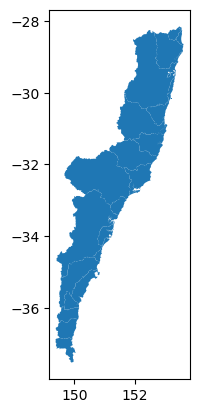

In [4]:
sen_river_regions.plot()

In [5]:
nec_river_regions = river_regions[(river_regions['Division'] == 'North East Coast') & (river_regions['RivRegNum'].astype(int) > 36)]
nec_river_regions

,RivRegName,RivRegNum,Division,geometry
98,BURRUM RIVER,37,North East Coast,"MULTIPOLYGON (((152.42625 -25.56597, 152.42653..."
99,MARY RIVER (QLD),38,North East Coast,"MULTIPOLYGON (((152.15625 -26.04986, 152.15625..."
100,FRASER ISLAND,39,North East Coast,"MULTIPOLYGON (((152.96236 -25.66931, 152.96236..."
101,NOOSA RIVER,40,North East Coast,"MULTIPOLYGON (((152.86986 -26.19931, 152.86958..."
102,MAROOCHY RIVER,41,North East Coast,"MULTIPOLYGON (((153.09236 -27.05069, 153.09236..."
103,PINE RIVER,42,North East Coast,"MULTIPOLYGON (((153.03236 -27.28514, 153.03236..."
104,BRISBANE RIVER,43,North East Coast,"MULTIPOLYGON (((152.05569 -27.81542, 152.05569..."
105,STRADBROKE ISLAND,44,North East Coast,"MULTIPOLYGON (((153.41792 -27.76097, 153.41819..."
106,LOGAN-ALBERT RIVERS,45,North East Coast,"MULTIPOLYGON (((153.31708 -27.70931, 153.31708..."
107,SOUTH COAST,46,North East Coast,"MULTIPOLYGON (((153.41375 -27.93014, 153.41375..."


<Axes: >

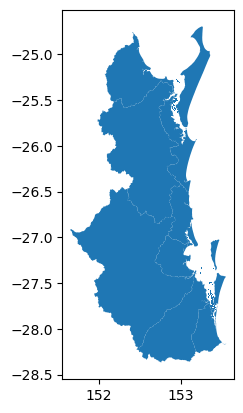

In [6]:
nec_river_regions.plot()

In [7]:
flood_river_regions = sen_river_regions.append(nec_river_regions)
flood_river_regions

/jobfs/94624143.gadi-pbs/ipykernel_2681681/2373436428.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flood_river_regions = sen_river_regions.append(nec_river_regions)


,RivRegName,RivRegNum,Division,geometry
42,MACQUARIE-TUGGERAH LAKES,11,South East Coast (NSW),"MULTIPOLYGON (((151.50403 -33.36069, 151.50403..."
43,HAWKESBURY RIVER,12,South East Coast (NSW),"MULTIPOLYGON (((150.32181 -34.64903, 150.32208..."
44,SYDNEY COAST-GEORGES RIVER,13,South East Coast (NSW),"MULTIPOLYGON (((151.01514 -34.08736, 151.01542..."
45,WOLLONGONG COAST,14,South East Coast (NSW),"MULTIPOLYGON (((150.69486 -34.62292, 150.69486..."
46,SHOALHAVEN RIVER,15,South East Coast (NSW),"MULTIPOLYGON (((149.54847 -35.99542, 149.54875..."
47,CLYDE RIVER-JERVIS BAY,16,South East Coast (NSW),"MULTIPOLYGON (((150.18542 -35.83375, 150.18542..."
48,MORUYA RIVER,17,South East Coast (NSW),"POLYGON ((149.74986 -35.53264, 149.74986 -35.5..."
49,TUROSS RIVER,18,South East Coast (NSW),"MULTIPOLYGON (((150.23014 -36.24264, 150.23014..."
50,BEGA RIVER,19,South East Coast (NSW),"POLYGON ((149.62986 -36.84486, 149.62986 -36.8..."
51,TOWAMBA RIVER,20,South East Coast (NSW),"MULTIPOLYGON (((149.92208 -37.04625, 149.92236..."


In [8]:
flood_division = flood_river_regions.dissolve()
flood_division = flood_division.drop(columns=['RivRegName', 'RivRegNum'])

In [9]:
flood_division['Division'][0] = 'EAST COAST FLOOD'

/jobfs/94624143.gadi-pbs/ipykernel_2681681/743800344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_division['Division'][0] = 'EAST COAST FLOOD'


In [10]:
flood_division

,geometry,Division
0,"MULTIPOLYGON (((149.91931 -37.04819, 149.91875...",EAST COAST FLOOD


<Axes: >

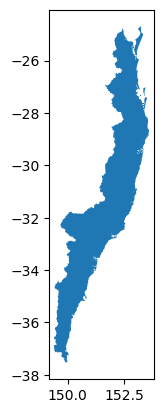

In [11]:
flood_division.plot()

In [12]:
flood_division.to_file('/g/data/xv83/dbi599/east-coast-rain/shapefiles/east-coast-flood.shp')

In [13]:
!ls /g/data/xv83/dbi599/east-coast-rain/shapefiles/

42343_shp.zip				east-coast-flood.prj
ADD_2021_AUST_GDA2020_SHP.zip		east-coast-flood.shp
australias-river-basins-1997.cpg	east-coast-flood.shx
australias-river-basins-1997.dbf	east-coast-flood_shp.zip
australias-river-basins-1997.prj	kx-australias-river-basins-1997-SHP.zip
australias-river-basins-1997.shp	south-east-coast-nsw.cpg
australias-river-basins-1997.shx	south-east-coast-nsw.dbf
australias-river-basins-1997.txt	south-east-coast-nsw.prj
east-coast-flood-river-regions_shp.zip	south-east-coast-nsw.shp
east-coast-flood.cpg			south-east-coast-nsw.shx
east-coast-flood.dbf			south-east-coast-nsw_shp.zip


## Day-by-day rainfall

In [12]:
agcd_files = glob.glob('/g/data/xv83/agcd-csiro/precip/daily/precip-total_AGCD-CSIRO_r005_*_daily.nc')
agcd_files.sort()

In [13]:
ds = xr.open_dataset(agcd_files[-1])

/jobfs/94624143.gadi-pbs/ipykernel_2681681/4028735409.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


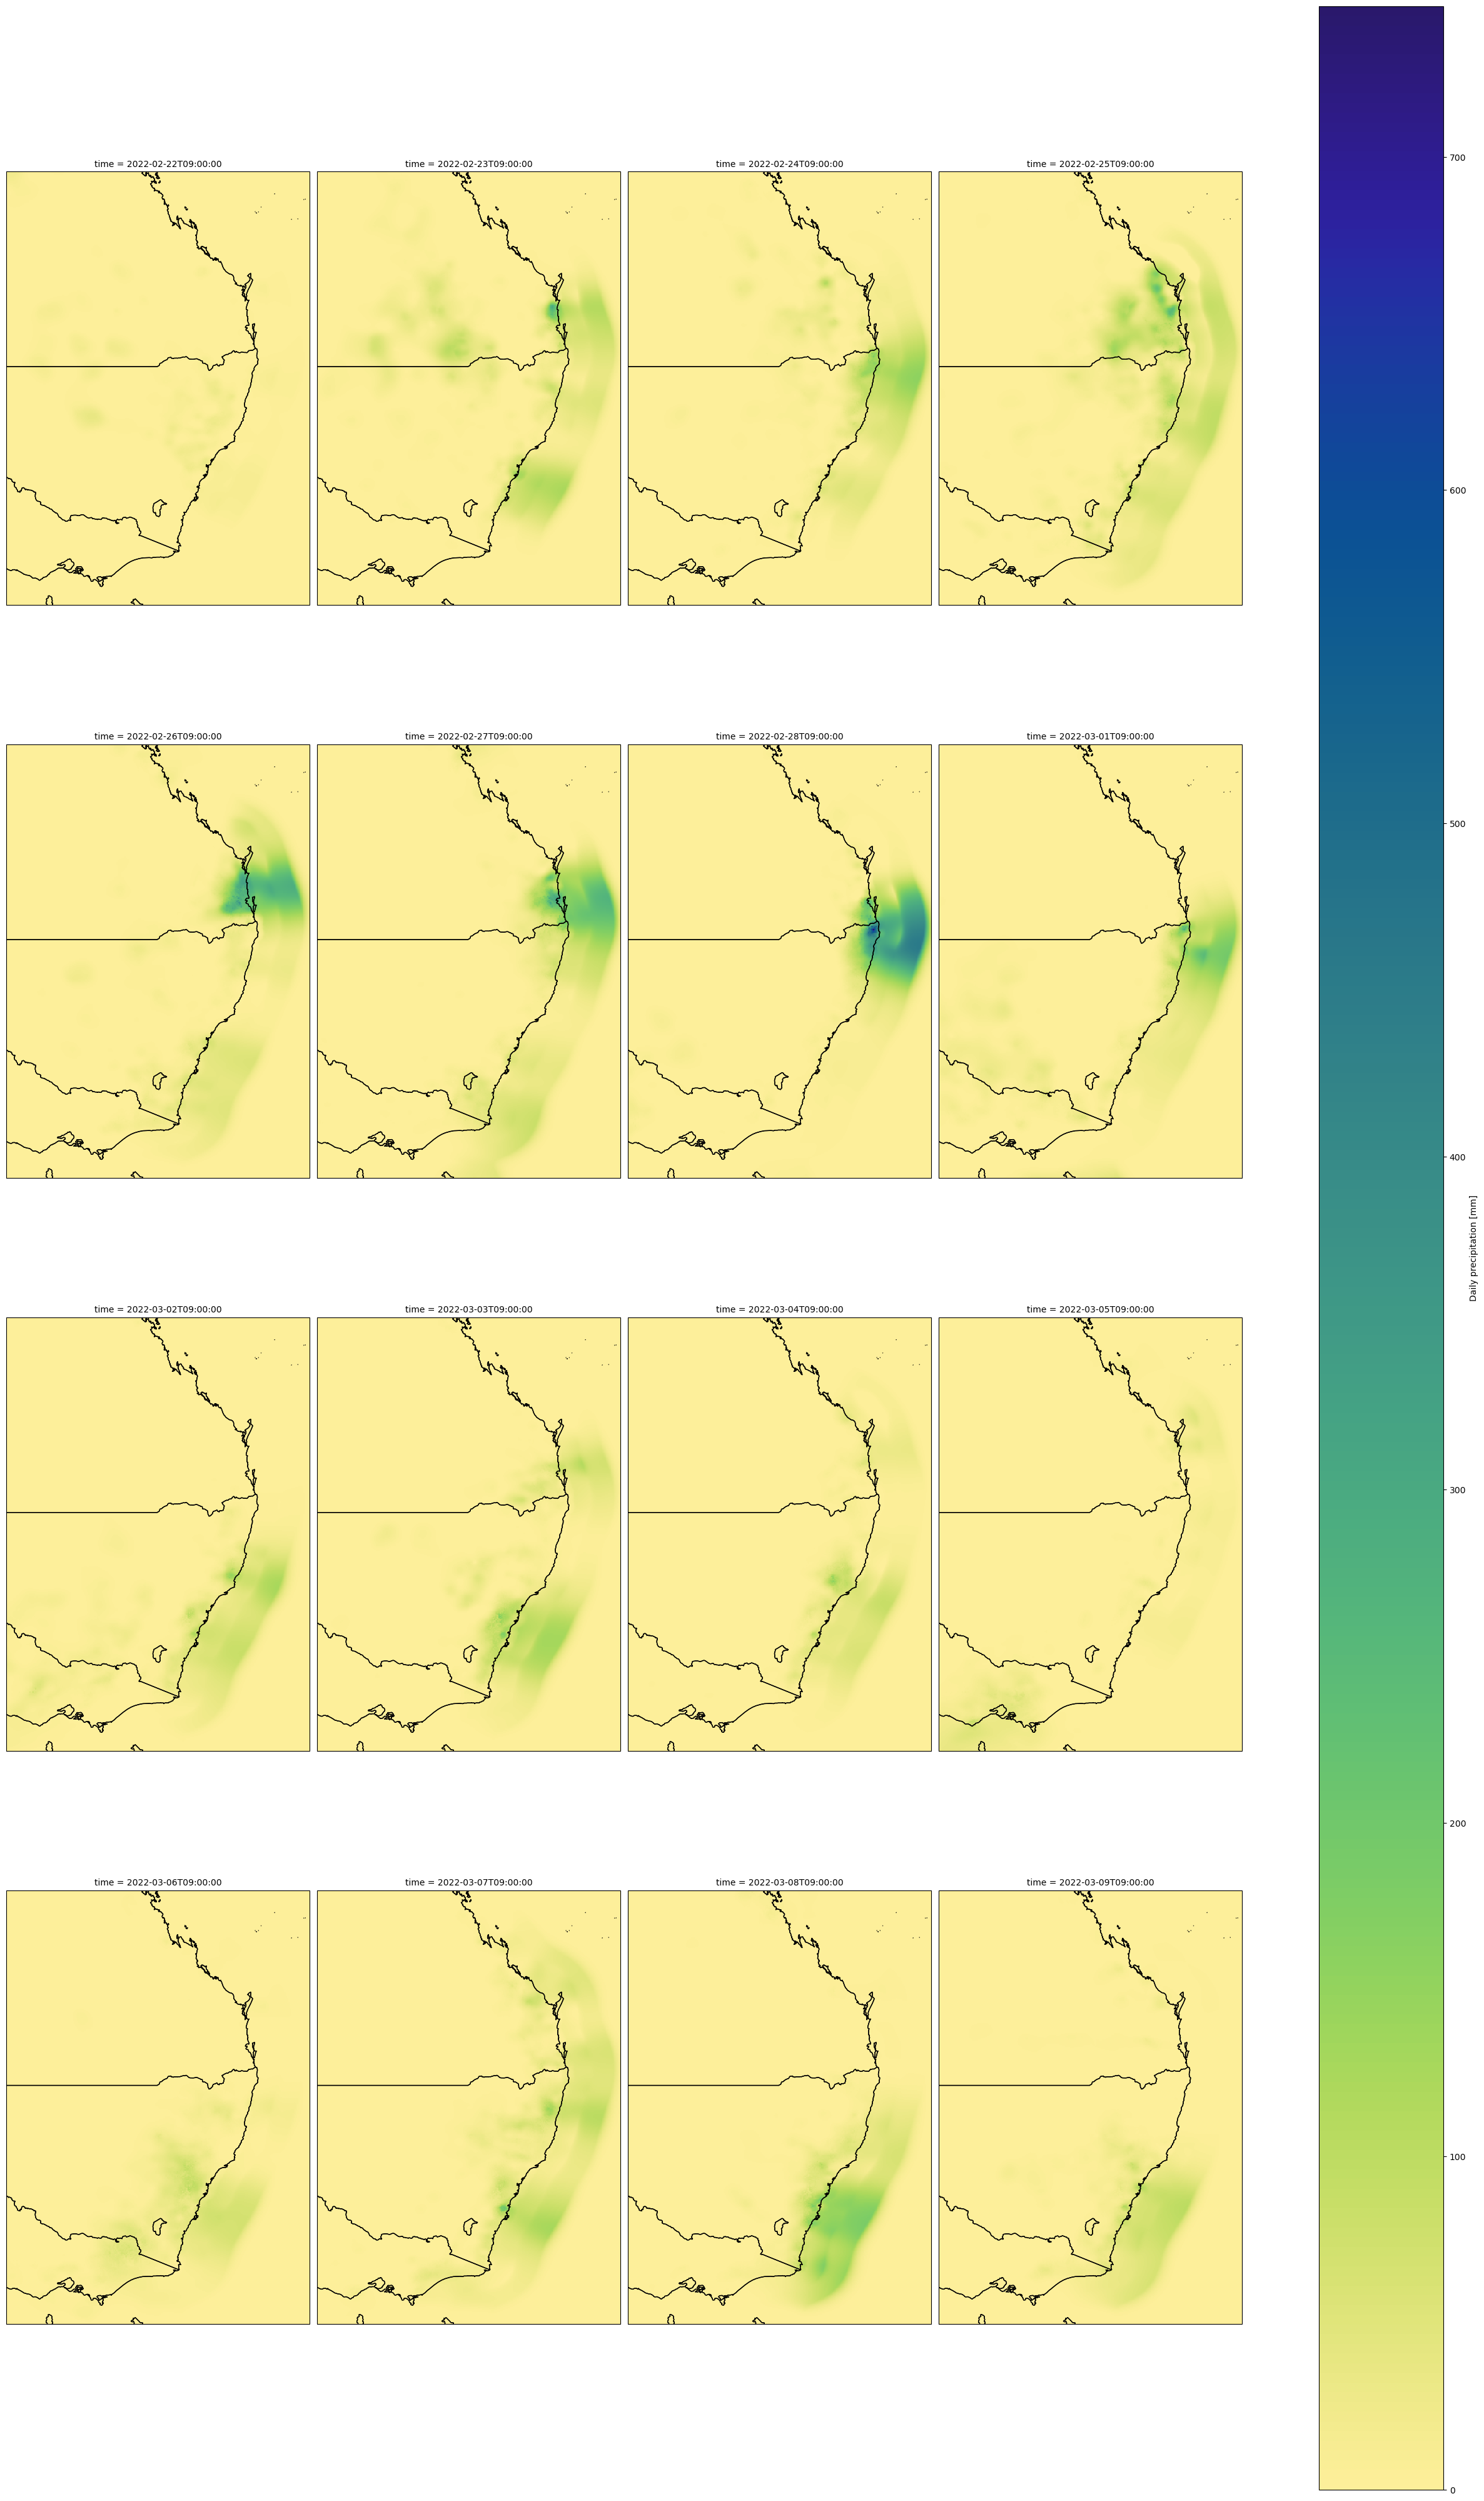

In [14]:
p = ds['precip'].sel(time=slice('2022-02-22', '2022-03-09')).plot(
    col='time',
    col_wrap=4,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.set_extent([142, 156, -20, -40], crs=ccrs.PlateCarree())

## Event summary

In [19]:
# AGCD

precip_total = ds['precip'].sel(time=slice('2022-02-23', '2022-03-09')).sum(dim=['time'])
ds_masked = fileio.open_dataset(
    agcd_files[-1],
    shapefile='/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp'
)
precip_total_masked = ds_masked['precip'].sel(time=slice('2022-02-23', '2022-03-09')).sum(dim=['time'], min_count=1)
precip_total_masked_box = spatial_selection.subset_lat(precip_total_masked, [-40, -20])
precip_total_masked_box = spatial_selection.subset_lon(precip_total_masked_box, [148, 153.5])

/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/xv83/dbi599/miniconda3/envs/unseen2/lib/python3.10/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  ret

In [15]:
# BARRA2

pr_files = glob.glob('/g/data/yb19/australian-climate-service/release/ACS-BARRA2/output/AUS-11/BOM/ECMWF-ERA5/historical/hres/BOM-BARRA-R2/v1/day/pr/pr_AUS-11_ECMWF-ERA5_historical_hres_BOM-BARRA-R2_v1_day_20220[2,3]*.nc')
pr_files.sort()

psl_files = glob.glob('/g/data/yb19/australian-climate-service/release/ACS-BARRA2/output/AUS-11/BOM/ECMWF-ERA5/historical/hres/BOM-BARRA-R2/v1/day/psl/psl_AUS-11_ECMWF-ERA5_historical_hres_BOM-BARRA-R2_v1_day_20220[2,3]*.nc')
psl_files.sort()

pr_ds = xr.open_mfdataset(pr_files)
psl_ds = xr.open_mfdataset(psl_files)

start_date = '2022-02-23'
end_date = '2022-03-09'

pr_da = pr_ds.sel({'time': slice(start_date, end_date)})['pr']
pr_da = xc.units.convert_units_to(pr_da, 'mm d-1')
psl_da = psl_ds.sel({'time': slice(start_date, end_date)})['psl']
psl_da = xc.units.convert_units_to(psl_da, 'hPa')

pr_da_sum = pr_da.sum('time', keep_attrs=True)
psl_da_mean = psl_da.mean('time', keep_attrs=True)

In [16]:
pr_da_sum = pr_da_sum.compute()

In [17]:
def plot_cities(ax, label_color='white'):
    lats = [-27.4705, -28.8094, -33.8688,]
    lons = [153.0260, 153.2879, 151.2093]
    cities = ['Brisbane', 'Lismore', 'Sydney']
    offsets = {'Brisbane': 0.55, 'Lismore': 0.4, 'Sydney': 0.3}
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(lon + offsets[city], lat, city, fontsize='large', color=label_color,
                transform=ccrs.PlateCarree())

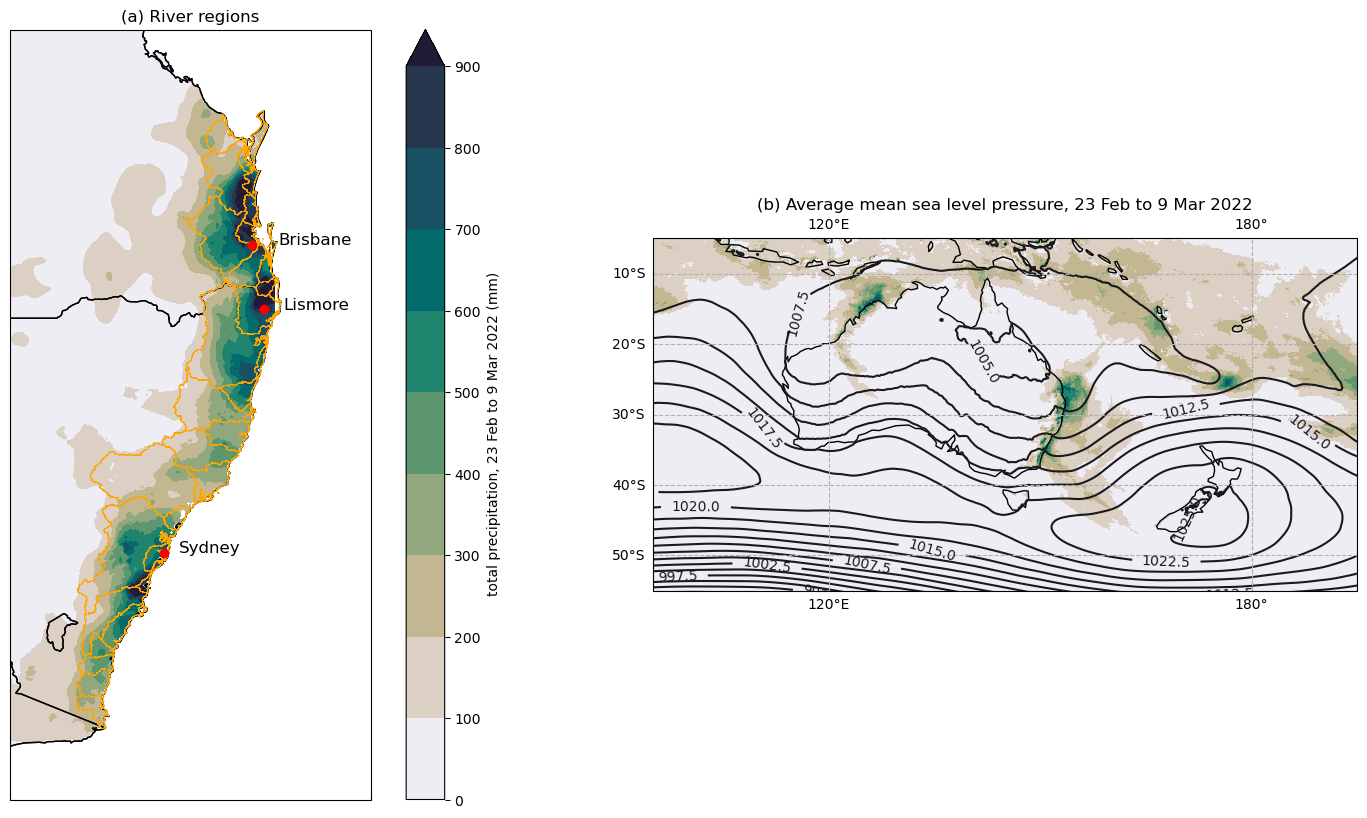

In [20]:
fig = plt.figure(figsize=[20, 10])
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree(central_longitude=180))

pr_levels = np.arange(0, 1000, 100)
cmap = cmocean.cm.rain
# cmocean.cm.haline_r

precip_total_masked_box.plot.contourf(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=pr_levels,
    cbar_kwargs={'label': f'total precipitation, 23 Feb to 9 Mar 2022 (mm)'},
)
ax1.coastlines()
ax1.add_feature(cartopy.feature.STATES)
ax1.add_geometries(sen_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', linewidth=0.5, edgecolor='orange')
ax1.add_geometries(nec_river_regions.geometry, ccrs.PlateCarree(), facecolor='none', linewidth=0.5,  edgecolor='orange')
ax1.set_extent([148, 155.5, -23, -39], crs=ccrs.PlateCarree())
plot_cities(ax1, label_color='black')
ax1.set_title('(a) River regions')

pr_da_sum.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=pr_levels,
    extend='max',
    add_colorbar=False,
)
    
lines = psl_da_mean.plot.contour(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    levels=np.arange(900, 1100, 2.5),
    colors=['0.1']
)
ax2.clabel(lines, colors=['0.1'], manual=False, inline=True)
ax2.coastlines()
ax2.set_extent([95, 195, -55, -5], crs=ccrs.PlateCarree())
ax2.gridlines(linestyle='--', draw_labels=True)
ax2.set_title(f'(b) Average mean sea level pressure, 23 Feb to 9 Mar 2022')

plt.savefig(
    f'/g/data/xv83/dbi599/east-coast-rain/figures/east-coast-rainfall_15day-totals_AGCD_river-regions.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300
)
plt.show()